In [75]:
# Importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import scipy.stats as stats
warnings.filterwarnings("ignore")

%matplotlib inline

In [247]:
# Reading the data set
df = pd.read_csv('listings.csv')
pd.set_option('max_columns',1000)
pd.set_option('max_rows',1000)

In [248]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18666,https://www.airbnb.com/rooms/18666,20190917034823,2019-09-17,Flat with Sunny Terrace,"Apartment located near the ""Plaza de las Glori...",Nice apartment situated on the penthouse floor...,"Apartment located near the ""Plaza de las Glori...",none,Apartment in Barcelona near to the Plaza de la...,NaN,"Good transports connections, 50 m from the met...",Free Wifi - air conditioning. We will provide ...,We can provide you all kind of entrance and ti...,Cleaning fee: 40 euros (to pay at arrival) Tou...,NaN,NaN,https://a0.muscache.com/im/pictures/47f88bc6-6...,NaN,71615,https://www.airbnb.com/users/show/71615,Mireia And Maria,2010-01-19,"Barcelona, Cataluña, Spain","We are Mireia (39) & Maria (41), two multiling...",within an hour,95%,NaN,f,https://a0.muscache.com/im/users/71615/profile...,https://a0.muscache.com/im/users/71615/profile...,El Camp de l'Arpa del Clot,47.0,47.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Barcelona, CT, Spain",Sant Martí,el Camp de l'Arpa del Clot,Sant Martí,Barcelona,CT,08026,Barcelona,"Barcelona, Spain",ES,Spain,41.40889,2.18555,t,Apartment,Entire home/apt,6,1.0,2.0,4.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",75.0,$130.00,NaN,NaN,$150.00,$42.00,2,$25.00,3,730,3,3,730,730,3.0,730.0,3 weeks ago,t,0,0,0,251,2019-09-17,1,0,2015-10-10,2015-10-10,80.0,10.0,10.0,2.0,10.0,10.0,8.0,t,HUTB-003004,NaN,f,f,flexible,f,f,31,31,0,0,0.02
1,18674,https://www.airbnb.com/rooms/18674,20190917034823,2019-09-17,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment with 110 m2 located in the 6th floor...,110m2 apartment to rent in Barcelona. Located ...,none,Apartment in Barcelona located in the heart of...,NaN,"Good transport connection, 150 m from metro “...",Free Wifi - air conditioning. We will provide ...,We can provide you all kind of entrance and ti...,Tourist tax at arrival: 2.48 Eur/person/night ...,NaN,NaN,https://a0.muscache.com/im/pictures/13031453/4...,NaN,71615,https://www.airbnb.com/users/show/71615,Mireia And Maria,2010-01-19,"Barcelona, Cataluña, Spain","We are Mireia (39) & Maria (41), two multiling...",within an hour,95%,NaN,f,https://a0.muscache.com/im/users/71615/profile...,https://a0.muscache.com/im/use

In [78]:
df.shape

(20404, 106)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20404 entries, 0 to 20403
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 16.5+ MB


In [80]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

In [81]:
print(df.columns.to_list())   

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [82]:
drop = df.columns[(df.isnull().mean()*100) > 80] 
# These are the columns which has more than 80 % null values.
# These can be dropped 
drop

Index(['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate', 'square_feet', 'weekly_price', 'monthly_price', 'jurisdiction_names'], dtype='object')

In [83]:
df.drop(drop, 1 ,inplace = True)

In [84]:
dff = df.iloc[:,22:]   # Dropping the first 22 columns as they are redundant.

In [85]:
dff['listing_id'] = df['id']  # Changing the id to listing id

In [86]:
# The following columns are also redundant
col_to_drop = ['host_thumbnail_url','host_picture_url','host_neighbourhood','street', 'neighbourhood', 
               'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 
               'smart_location', 'country_code', 'country', 'latitude', 'longitude','calendar_updated','calendar_last_scraped',
              'first_review','last_review','license']

In [87]:
# Dropping the columns
dff.drop(col_to_drop,axis = 1, inplace = True)

In [88]:
dff.shape

(20404, 56)

In [89]:
dff.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id
0,within an hour,95%,f,47.0,47.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,t,Apartment,Entire home/apt,6,1.0,2.0,4.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",$130.00,$150.00,$42.00,2,$25.00,3,730,3,3,730,730,3.0,730.0,t,0,0,0,251,1,0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,t,f,f,flexible,f,f,31,31,0,0,0.02,18666
1,within an hour,95%,f,47.0,47.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,t,Apartment,Entire home/apt,8,2.0,3.0,6.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",$60.00,$150.00,$50.00,2,$30.00,1,1125,1,5,1125,1125,1.9,1125.0,t,13,31,43,52,16,11,85.0,9.0,9.0,9.0,10.0,9.0,8.0,t,t,f,strict_14_with_grace_period,f,f,31,31,0,0,0.21,18674
2,within a few hours,100%,f,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",$33.00,$100.00,NaN,1,$10.00,2,1125,2,4,1125,1125,2.1,1125.0,t,3,3,3,3,125,31,90.0,10.0,9.0,10.0,10.0,9.0,9.0,t,f,f,moderate,f,f,2,0,2,0,3.05,21605
3,within an hour,100%,t,5.0,5.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,f,Apartment,Entire home/apt,6,2.0,3.0,5.0,Real Bed,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",$210.00,$300.00,$80.00,3,$10.00,3,1125,3,5,1125,1125,3.1,1125.0,t,10,33,56,326,49,17,94.0,10.0,10.0,10.0,10.0,9.0,9.0,t,t,f,strict_14_with_grace_period,f,t,2,2,0,0,0.47,23197
4,within an hour,100%,t,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Smoking a...",$45.00,NaN,NaN,1,$25.00,1,730,1,1,730,730,1.0,730.0,t,10,31,41,77,254,48,95.0,10.0,10.0,10.0,10.0,10.0,10.0,t,t,f,strict_14_with_grace_period,t,t,1,0,1,0,2.29,25786


In [90]:
# checking the value counts for each individual feature
for i in dff.columns:
    print(i, dff[i].value_counts())
    print('\n\n\n')        

host_response_time within an hour        12246
within a few hours     3030
within a day           2329
a few days or more      269
Name: host_response_time, dtype: int64




host_response_rate 100%    10962
90%       975
98%       897
99%       656
96%       375
80%       330
97%       316
95%       284
93%       235
70%       166
50%       162
91%       151
94%       150
0%        143
58%       140
92%       117
75%       116
67%       111
60%       106
86%       104
89%       101
79%       100
53%        99
84%        98
62%        85
61%        80
85%        71
88%        70
71%        63
83%        63
57%        52
73%        49
77%        39
69%        38
52%        36
33%        35
40%        33
87%        32
65%        28
82%        25
78%        21
56%        19
63%        19
74%        17
64%        17
25%        14
76%        13
30%        11
43%         8
81%         8
20%         6
55%         4
54%         3
13%         3
59%         3
10%         2
17%         2
68%      

review_scores_communication 10.0    10848
9.0      3789
8.0       769
6.0       166
7.0       157
2.0        64
4.0        36
5.0        19
3.0         2
Name: review_scores_communication, dtype: int64




review_scores_location 10.0    10867
9.0      4002
8.0       716
7.0       104
6.0        98
4.0        24
2.0        24
5.0         7
Name: review_scores_location, dtype: int64




review_scores_value 9.0     7528
10.0    5086
8.0     2335
7.0      463
6.0      244
2.0       82
4.0       53
5.0       50
3.0        2
Name: review_scores_value, dtype: int64




requires_license t    20404
Name: requires_license, dtype: int64




instant_bookable t    11738
f     8666
Name: instant_bookable, dtype: int64




is_business_travel_ready f    20404
Name: is_business_travel_ready, dtype: int64




cancellation_policy strict_14_with_grace_period    10210
flexible                        5156
moderate                        4822
super_strict_30                  203
super_strict_60              

In [91]:
# checking the number of null values for each feature
dff.isnull().sum()

host_response_time                              2530
host_response_rate                              2530
host_is_superhost                                 22
host_listings_count                               22
host_total_listings_count                         22
host_verifications                                 0
host_has_profile_pic                              22
host_identity_verified                            22
is_location_exact                                  0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms                                          7
bedrooms                                           8
beds                                              33
bed_type                                           0
amenities                                          0
price                                              0
security_deposit                              

### DATA PREPROCSSING

In [92]:
dff['host_response_rate'] = dff['host_response_rate'].str.replace('%','')
dff['security_deposit'] = dff['security_deposit'].str.replace('$', '')
dff['cleaning_fee'] = dff['cleaning_fee'].str.replace('$','')
dff['security_deposit'] = dff['security_deposit'].str.replace(',','')
dff['security_deposit'] = dff['security_deposit'].str.replace(' ','')
dff['price'] = dff['price'].str.replace('$','')
dff['extra_people'] = dff['extra_people'].str.replace('$','')
dff['price'] = dff['price'].str.replace(',','').astype(float)

In [93]:
dff['host_listings_count'] = dff['host_listings_count'].astype(float)
dff['host_response_rate'] = dff['host_response_rate'].astype(float)
dff['security_deposit'] = dff['security_deposit'].astype(float)
dff['cleaning_fee'] = dff['cleaning_fee'].astype(float) 
dff['extra_people'] = dff['extra_people'].astype(float)

In [94]:
dff['host_response_time'] = dff['host_response_time'].fillna(dff['host_response_time'].mode()[0])
dff['host_response_rate'] = dff['host_response_rate'].fillna(dff['host_response_rate'].mean())
dff['host_is_superhost'] = dff['host_is_superhost'].fillna(dff['host_is_superhost'].mode()[0])
dff['host_listings_count'] = dff['host_listings_count'].fillna(dff['host_listings_count'].mean())
dff['host_total_listings_count'] = dff['host_total_listings_count'].fillna(dff['host_total_listings_count'].mean())
dff['host_has_profile_pic'] = dff['host_has_profile_pic'].fillna(dff['host_has_profile_pic'].mode()[0])
dff['host_identity_verified'] = dff['host_identity_verified'].fillna(dff['host_identity_verified'].mode()[0])
dff['bathrooms'] = dff['bathrooms'].fillna(dff['bathrooms'].mean())
dff['bedrooms'] = dff['bedrooms'].fillna(dff['bedrooms'].mean())
dff['beds'] = dff['beds'].fillna(dff['beds'].mean())
dff['security_deposit'] = dff['security_deposit'].fillna(dff['security_deposit'].mean())
dff['cleaning_fee'] = dff['cleaning_fee'].fillna(dff['cleaning_fee'].mean())


In [95]:
dff.columns

Index(['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'instant_bookable', 'is_business_travel_ready',
       'canc

In [96]:
for i in ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value','reviews_per_month']:
    dff[i] = dff[i].fillna(dff[i].mean())

In [97]:
# Checking if there are any null values.
dff.isnull().any().any()

False

In [98]:
# Creating a new data frame for all the boolean columns
bools_col = dff[['host_has_profile_pic','host_identity_verified','host_is_superhost','is_location_exact','requires_license',
   'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture','require_guest_phone_verification','has_availability']]

In [99]:
def bools(x):
    if x == 'f':
        return False
    elif x == 't':
        return True

In [100]:
for i in  bools_col.columns:
    dff[i] = bools_col[i].apply(bools)

In [101]:
dff.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id
0,within an hour,95.0,False,47.0,47.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",True,True,True,Apartment,Entire home/apt,6,1.0,2.0,4.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",130.0,150.000000,42.000000,2,25.0,3,730,3,3,730,730,3.0,730.0,True,0,0,0,251,1,0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,True,False,False,flexible,False,False,31,31,0,0,0.02,18666
1,within an hour,95.0,False,47.0,47.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",True,True,True,Apartment,Entire home/apt,8,2.0,3.0,6.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",60.0,150.000000,50.000000,2,30.0,1,1125,1,5,1125,1125,1.9,1125.0,True,13,31,43,52,16,11,85.0,9.0,9.0,9.0,10.0,9.0,8.0,True,True,False,strict_14_with_grace_period,False,False,31,31,0,0,0.21,18674
2,within a few hours,100.0,False,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",True,True,True,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",33.0,100.000000,42.600726,1,10.0,2,1125,2,4,1125,1125,2.1,1125.0,True,3,3,3,3,125,31,90.0,10.0,9.0,10.0,10.0,9.0,9.0,True,False,False,moderate,False,False,2,0,2,0,3.05,21605
3,within an hour,100.0,True,5.0,5.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",True,True,False,Apartment,Entire home/apt,6,2.0,3.0,5.0,Real Bed,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",210.0,300.000000,80.000000,3,10.0,3,1125,3,5,1125,1125,3.1,1125.0,True,10,33,56,326,49,17,94.0,10.0,10.0,10.0,10.0,9.0,9.0,True,True,False,strict_14_with_grace_period,False,True,2,2,0,0,0.47,23197
4,within an hour,100.0,True,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",True,True,True,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Smoking a...",45.0,246.741621,42.600726,1,25.0,1,730,1,1,730,730,1.0,730.0,True,10,31,41,77,254,48,95.0,10.0,10.0,10.0,10.0,10.0,10.0,True,True,False,strict_14_with_grace_period,True,True,1,0,1,0,2.29,25786


In [102]:
# Dropping extra redundant columns
dff.drop(['host_verifications','amenities'],1,inplace = True)

In [103]:
# Selecting the 'object' features for label encoding
dff.select_dtypes(object)

,host_response_time,property_type,room_type,bed_type,cancellation_policy
0,within an hour,Apartment,Entire home/apt,Real Bed,flexible
1,within an hour,Apartment,Entire home/apt,Real Bed,strict_14_with_grace_period
2,within a few hours,Apartment,Private room,Real Bed,moderate
3,within an hour,Apartment,Entire home/apt,Real Bed,strict_14_with_grace_period
4,within an hour,Apartment,Private room,Real Bed,strict_14_with_grace_period
...,...,...,...,...,...
20399,within an hour,Apartment,Private room,Real Bed,flexible
20400,within an hour,Apartment,Private room,Real Bed,strict_14_with_grace_period
20401,within an hour,Apartment,Private room,Real Bed,strict_14_with_grace_period
20402,within an hour,Apartment,Private room,Real Bed,flexible


In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
le = LabelEncoder()

In [106]:
for i in dff.select_dtypes(object).columns:
    dff[i] = le.fit_transform(dff[i])

In [107]:
dff.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id
0,3,95.0,False,47.0,47.0,True,True,True,1,0,6,1.0,2.0,4.0,4,130.0,150.000000,42.000000,2,25.0,3,730,3,3,730,730,3.0,730.0,True,0,0,0,251,1,0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,True,False,False,0,False,False,31,31,0,0,0.02,18666
1,3,95.0,False,47.0,47.0,True,True,True,1,0,8,2.0,3.0,6.0,4,60.0,150.000000,50.000000,2,30.0,1,1125,1,5,1125,1125,1.9,1125.0,True,13,31,43,52,16,11,85.0,9.0,9.0,9.0,10.0,9.0,8.0,True,True,False,3,False,False,31,31,0,0,0.21,18674
2,2,100.0,False,2.0,2.0,True,True,True,1,2,2,1.0,1.0,1.0,4,33.0,100.000000,42.600726,1,10.0,2,1125,2,4,1125,1125,2.1,1125.0,True,3,3,3,3,125,31,90.0,10.0,9.0,10.0,10.0,9.0,9.0,True,False,False,1,False,False,2,0,2,0,3.05,21605
3,3,100.0,True,5.0,5.0,True,True,False,1,0,6,2.0,3.0,5.0,4,210.0,300.000000,80.000000,3,10.0,3,1125,3,5,1125,1125,3.1,1125.0,True,10,33,56,326,49,17,94.0,10.0,10.0,10.0,10.0,9.0,9.0,True,True,False,3,False,True,2,2,0,0,0.47,23197
4,3,100.0,True,1.0,1.0,True,True,True,1,2,2,1.0,1.0,1.0,4,45.0,246.741621,42.600726,1,25.0,1,730,1,1,730,730,1.0,730.0,True,10,31,41,77,254,48,95.0,10.0,10.0,10.0,10.0,10.0,10.0,True,True,False,3,True,True,1,0,1,0,2.29,25786


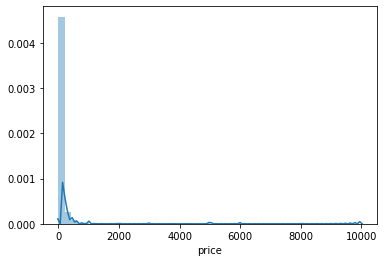

In [108]:
# Checking the distribution of the target feature
sns.distplot(dff['price'])

In [109]:
dff.price.skew()

12.23014796536053

In [110]:
# As we can see the target feature is right skewed. Therefore we need to transform the data

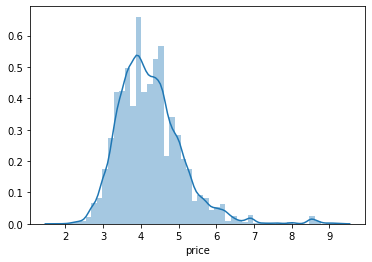

In [111]:
# Log transforming the data
sns.distplot(np.log(dff['price']))

In [250]:
print('Mean',np.mean(np.log(dff.price)))
print('Median',np.median(np.log(dff.price)))
print('Std',np.std(np.log(dff.price)))
print('mode',stats.mode(np.log(dff.price))[0][0])

Mean 4.242050372142013
Median 4.110873864173311
Std 0.8587780043628439
mode 3.912023005428146


In [113]:
dff['log_price'] = np.log(dff['price'])

In [114]:
X = dff.drop(['log_price','price'],1)
y = dff['log_price']

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [117]:
import statsmodels.api as sm

In [118]:
X_cons = sm.add_constant(X)
model = sm.OLS(y, X_cons.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     414.7
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:25:14   Log-Likelihood:                -18782.
No. Observations:               20404   AIC:                         3.766e+04
Df Residuals:                   20354   BIC:                         3.806e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
host_response_time                               0.0689      0.008      8.500      0.000       0.053       0.085
host_response_rate                              -0.0021      0.000     -4.899      0.000      -0.003      -0.001
host_is_superhost                                0.1381      0.013     10.956      0.000       0.113       0.163
host_listings_count                             -0.0007   7.23e-05     -9.717      0.000      -0.001      -0.001
host_total_listings_count                       -0.0007   7.23e-05     -9.717      0.000      -0.001      -0.001
host_has_profile_pic                            -0.2264      0.094     -2.399      0.016      -0.411      -0.041
host_identity_verified                          -0.0328      0.010     -3.300      0.001      -0.052      -0.013
is_location_exact                                0.0201      0.009      2.138      0.032       0.002       0.039
property_type                                    0.0053      0.001      7.037      0.000       0.004       0.007
room_type                                       -0.2696      0.007    -39.274      0.000      -0.283      -0.256
accommodates                                     0.1404      0.005     28.696      0.000       0.131       0.150
bathrooms                                        0.0576      0.008      6.898      0.000       0.041       0.074
bedrooms                                         0.0223      0.008      2.750      0.006       0.006       0.038
beds                                            -0.0418      0.005     -8.358      0.000      -0.052      -0.032
bed_type                                         0.0113      0.037      0.309      0.757      -0.060       0.083
security_deposit                             -2.127e-07   1.32e-05     -0.016      0.987   -2.62e-05    2.57e-05
cleaning_fee                                 -4.542e-05      0.000     -0.301      0.763      -0.000       0.000
guests_included                                  0.0317      0.004      8.260      0.000       0.024       0.039
extra_people                                     0.0021      0.000      6.706      0.000       0.001       0.003
minimum_nights                                  -0.0012      0.001     -0.945      0.345      -0.004       0.001
maximum_nights                                   0.0002   4.29e-05      5.044      0.000       0.000       0.000
minimum_minimum_nights                          -0.0060      0.001     -4.097      0.000      -0.009      -0.003
maximum_minimum_nights                       -4.305e-05      0.001     -0.048      0.962      -0.002       0.002
minimum_maximum_nights                          -0.0003    4.4e-05     -7.940      0.000      -0.000      -0.000
maximum_maximum_nights          

In [119]:
# Base model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.49926914653981747
0.49642587475486044


### LR ASSUMPTION 1  - NO AUTO CORRELATION

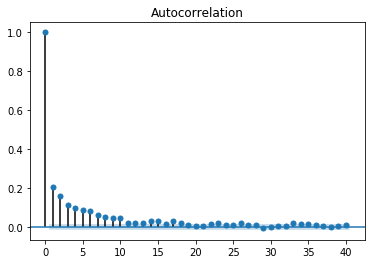

In [120]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(model.resid, lags=40 , alpha=0.05)
acf.show()

In [121]:
# We shall use Durbin Watson test to check auto correlation.
# we can see here the values of dublin watson test : 1.587 (POSITIVE AUTO-CORRELATION)

### LR ASSUMPTION 2 - NORMALITY OF RESIDUALS

In [122]:
print(stats.jarque_bera(model.resid))

(89150.56144211709, 0.0)


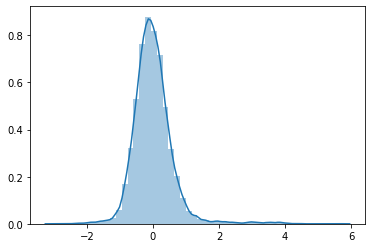

In [123]:
isns.distplot(model.resid)

In [267]:
# For a good model the residuals should be normally distributed.
# The higher the value of Jarque Bera test , the lesser the residuals are normally distributed.
# jarque-bera test value (test for normality) : 89150
# The critical chi square value at the 5% level of significance is 5.99. 
# If the computed value exceeds this value the null hypothesis is rejected.

# In this case the computed value of the JB statistic 89150 is greater than 5.99. 
# Thus we reject the null hypothesis that the error terms are normally distributed.

### LR Asssumption 3 - Linearity of residuals

In [125]:
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):

    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(model, y)  

#### RAINBOW TEST

In [126]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=model, frac=0.5)

(0.71881679722619, 0.9999999999999999)

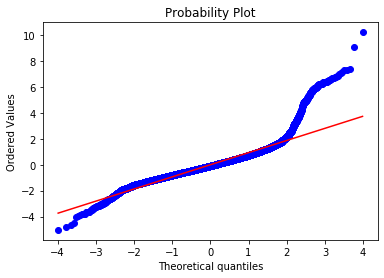

In [127]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = model.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [128]:
# In order for the residuals to be linear. The mean value of the residuals should be zero.
model.resid.mean()

1.742481449377486e-10

In [129]:
# Here we can see that the value is close to zero. Hence we can infer that the linearity is present.

### LR ASSUMPTION 4 - HOMOSCEDASTICITY 

In [130]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

In [131]:
# Since the p values is less than 0.05. We can infer that the it is Heteroscedacious distribution.

### LR ASSUMPTION 5 - NO MULTI COLLINEARITY

In [132]:
dff.select_dtypes('bool')

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,has_availability,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification
0,False,True,True,True,True,True,False,False,False,False
1,False,True,True,True,True,True,True,False,False,False
2,False,True,True,True,True,True,False,False,False,False
3,True,True,True,False,True,True,True,False,False,True
4,True,True,True,True,True,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...
20399,False,True,False,False,True,True,True,False,False,False
20400,False,True,False,True,True,True,True,False,False,False
20401,False,True,False,True,True,True,True,False,False,False
20402,False,True,False,True,True,True,True,False,False,False


In [134]:
bools_col = dff[['host_has_profile_pic','host_identity_verified','host_is_superhost','is_location_exact','requires_license',
   'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture','require_guest_phone_verification','has_availability']]

In [135]:
def bools(x):
    if x == False:
        return 0
    elif x == True:
        return 1

In [136]:
for i in  bools_col.columns:
    dff[i] = dff[i].apply(bools)
    dff[i] = dff[i].astype(int)

In [142]:
X = dff.drop(['log_price','price'],1)
y = dff['log_price']
X_cons = sm.add_constant(X)
model = sm.OLS(y, X_cons.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     414.7
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:28:50   Log-Likelihood:                -18782.
No. Observations:               20404   AIC:                         3.766e+04
Df Residuals:                   20354   BIC:                         3.806e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
host_response_time                               0.0689      0.008      8.500      0.000       0.053       0.085
host_response_rate                              -0.0021      0.000     -4.899      0.000      -0.003      -0.001
host_is_superhost                                0.1381      0.013     10.956      0.000       0.113       0.163
host_listings_count                             -0.0007   7.23e-05     -9.717      0.000      -0.001      -0.001
host_total_listings_count                       -0.0007   7.23e-05     -9.717      0.000      -0.001      -0.001
host_has_profile_pic                            -0.2264      0.094     -2.399      0.016      -0.411      -0.041
host_identity_verified                          -0.0328      0.010     -3.300      0.001      -0.052      -0.013
is_location_exact                                0.0201      0.009      2.138      0.032       0.002       0.039
property_type                                    0.0053      0.001      7.037      0.000       0.004       0.007
room_type                                       -0.2696      0.007    -39.274      0.000      -0.283      -0.256
accommodates                                     0.1404      0.005     28.696      0.000       0.131       0.150
bathrooms                                        0.0576      0.008      6.898      0.000       0.041       0.074
bedrooms                                         0.0223      0.008      2.750      0.006       0.006       0.038
beds                                            -0.0418      0.005     -8.358      0.000      -0.052      -0.032
bed_type                                         0.0113      0.037      0.309      0.757      -0.060       0.083
security_deposit                             -2.127e-07   1.32e-05     -0.016      0.987   -2.62e-05    2.57e-05
cleaning_fee                                 -4.542e-05      0.000     -0.301      0.763      -0.000       0.000
guests_included                                  0.0317      0.004      8.260      0.000       0.024       0.039
extra_people                                     0.0021      0.000      6.706      0.000       0.001       0.003
minimum_nights                                  -0.0012      0.001     -0.945      0.345      -0.004       0.001
maximum_nights                                   0.0002   4.29e-05      5.044      0.000       0.000       0.000
minimum_minimum_nights                          -0.0060      0.001     -4.097      0.000      -0.009      -0.003
maximum_minimum_nights                       -4.305e-05      0.001     -0.048      0.962      -0.002       0.002
minimum_maximum_nights                          -0.0003    4.4e-05     -7.940      0.000      -0.000      -0.000
maximum_maximum_nights          

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_cons.values, i) for i in range(X_cons.shape[1])]
pd.DataFrame({'vif': vif}, index=X.columns).T

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id
vif,1.995159,1.820217,1.277286,inf,inf,1.009058,1.181833,1.073523,1.251337,2.543002,6.224835,1.481934,3.565169,4.606623,1.010485,1.220879,1.824309,1.948413,1.119812,32.350788,4.591059e+10,41.039948,17.239728,4.820757e+10,1.435044e+11,90.767945,1.483668e+11,0.0,7.056682,30.007561,17.399118,1.678511,3.881375,4.566031,4.657225,3.077158,2.166471,2.409926,2.633393,1.500615,3.161521,0.0,1.303505,NaN,1.14328,1.42885,1.4741,123.626749,117.739829,11.049091,1.082354,2.802866,2.297604


In [246]:
# Since some features VIF value is more than 2. We can infer that multicollinearity exists.

### FEATURE SELECTION

In [148]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
est = sm.OLS(y, X_1.astype(float)).fit()
# model = sm.OLS(np.asarray(y), np.asarray(X_1).fit()
model.pvalues

host_response_time                               2.021827e-17
host_response_rate                               9.685253e-07
host_is_superhost                                7.409634e-28
host_listings_count                              2.856140e-22
host_total_listings_count                        2.856766e-22
host_has_profile_pic                             1.645851e-02
host_identity_verified                           9.675569e-04
is_location_exact                                3.248968e-02
property_type                                    2.030477e-12
room_type                                        0.000000e+00
accommodates                                    1.436778e-177
bathrooms                                        5.421882e-12
bedrooms                                         5.965856e-03
beds                                             6.777783e-17
bed_type                                         7.571678e-01
security_deposit                                 9.871759e-01
cleaning

In [149]:
#Backward Elimination
cols = list(X_1.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y, X_1.astype(float)).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols[1:])      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'extra_people', 'maximum_nights', 'minimum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_90', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'require_guest_phone_verification', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_p

In [150]:
X_cons = sm.add_constant(X[selected_features_BE])
model = sm.OLS(y, X_cons.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     521.0
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:29:02   Log-Likelihood:                -18786.
No. Observations:               20404   AIC:                         3.765e+04
Df Residuals:                   20364   BIC:                         3.797e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
host_response_time                               0.0682      0.008      8.450      0.000       0.052       0.084
host_response_rate                              -0.0020      0.000     -4.817      0.000      -0.003      -0.001
host_is_superhost                                0.1385      0.013     11.010      0.000       0.114       0.163
host_listings_count                             -0.0007   7.22e-05     -9.715      0.000      -0.001      -0.001
host_total_listings_count                       -0.0007   7.22e-05     -9.715      0.000      -0.001      -0.001
host_has_profile_pic                            -0.2240      0.094     -2.374      0.018      -0.409      -0.039
host_identity_verified                          -0.0331      0.010     -3.339      0.001      -0.053      -0.014
is_location_exact                                0.0197      0.009      2.104      0.035       0.001       0.038
property_type                                    0.0053      0.001      7.059      0.000       0.004       0.007
room_type                                       -0.2689      0.007    -41.020      0.000      -0.282      -0.256
accommodates                                     0.1402      0.005     28.699      0.000       0.131       0.150
bathrooms                                        0.0582      0.008      6.979      0.000       0.042       0.075
bedrooms                                         0.0221      0.008      2.743      0.006       0.006       0.038
beds                                            -0.0416      0.005     -8.345      0.000      -0.051      -0.032
guests_included                                  0.0319      0.004      8.347      0.000       0.024       0.039
extra_people                                     0.0021      0.000      6.737      0.000       0.001       0.003
maximum_nights                                   0.0002   4.27e-05      5.224      0.000       0.000       0.000
minimum_minimum_nights                          -0.0066      0.000    -26.233      0.000      -0.007      -0.006
minimum_maximum_nights                          -0.0004   4.37e-05     -8.147      0.000      -0.000      -0.000
maximum_maximum_nights                           0.0006   7.57e-05      7.670      0.000       0.000       0.001
maximum_nights_avg_ntm                          -0.0004    7.7e-05     -5.808      0.000      -0.001      -0.000
has_availability                                 1.7636      0.061     28.976      0.000       1.644       1.883
availability_30                                  0.0093      0.001     11.007      0.000       0.008       0.011
availability_90                                  0.0014      0.000      6.038      0.000       0.001       0.002
number_of_reviews               

In [151]:
len(dff.columns)

55

In [252]:
#no of features
nof_list=np.arange(1,55)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 44
Score with 44 features: 0.498332


In [ ]:
# The score of the base model is better when compared to the feature selected models.

In [159]:
dff.columns

Index(['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_pr

In [160]:
from sklearn.ensemble import RandomForestRegressor

params = {'n_estimators' : [2,5,8,10,15,18,20],
    'criterion':['mse','mae'],
    'max_depth':[3,5,7,9,11,13,15],
    'min_samples_split':[2,3,4],
    'min_samples_leaf' : [1,3,5]}

rf = RandomForestRegressor(n_estimators=10)
X_rf = dff.drop(['log_price','price'],1)
y_rf = dff['log_price']
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.33, random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [161]:
print('Train score -',rf.score(X_train,y_train))
print('test score - ',rf.score(X_test,y_test))

Train score - 0.9491791699063616
test score -  0.712888474721574


In [162]:
# The model over fits. Let us try cross validation techniques and see if the model over fits in other sets.

In [166]:
dff.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,log_price
0,3,95.0,0,47.0,47.0,1,1,1,1,0,6,1.0,2.0,4.0,4,130.0,150.000000,42.000000,2,25.0,3,730,3,3,730,730,3.0,730.0,1,0,0,0,251,1,0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,1,0,0,0,0,0,31,31,0,0,0.02,18666,4.867534
1,3,95.0,0,47.0,47.0,1,1,1,1,0,8,2.0,3.0,6.0,4,60.0,150.000000,50.000000,2,30.0,1,1125,1,5,1125,1125,1.9,1125.0,1,13,31,43,52,16,11,85.0,9.0,9.0,9.0,10.0,9.0,8.0,1,1,0,3,0,0,31,31,0,0,0.21,18674,4.094345
2,2,100.0,0,2.0,2.0,1,1,1,1,2,2,1.0,1.0,1.0,4,33.0,100.000000,42.600726,1,10.0,2,1125,2,4,1125,1125,2.1,1125.0,1,3,3,3,3,125,31,90.0,10.0,9.0,10.0,10.0,9.0,9.0,1,0,0,1,0,0,2,0,2,0,3.05,21605,3.496508
3,3,100.0,1,5.0,5.0,1,1,0,1,0,6,2.0,3.0,5.0,4,210.0,300.000000,80.000000,3,10.0,3,1125,3,5,1125,1125,3.1,1125.0,1,10,33,56,326,49,17,94.0,10.0,10.0,10.0,10.0,9.0,9.0,1,1,0,3,0,1,2,2,0,0,0.47,23197,5.347108
4,3,100.0,1,1.0,1.0,1,1,1,1,2,2,1.0,1.0,1.0,4,45.0,246.741621,42.600726,1,25.0,1,730,1,1,730,730,1.0,730.0,1,10,31,41,77,254,48,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,3,1,1,1,0,1,0,2.29,25786,3.806662


In [168]:
X = dff.drop(['log_price','price'],1)
y = dff['log_price']

In [169]:
X_cons = sm.add_constant(X)
model = sm.OLS(y, X_cons.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     414.7
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:29:17   Log-Likelihood:                -18782.
No. Observations:               20404   AIC:                         3.766e+04
Df Residuals:                   20354   BIC:                         3.806e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
host_response_time                               0.0689      0.008      8.500      0.000       0.053       0.085
host_response_rate                              -0.0021      0.000     -4.899      0.000      -0.003      -0.001
host_is_superhost                                0.1381      0.013     10.956      0.000       0.113       0.163
host_listings_count                             -0.0007   7.23e-05     -9.717      0.000      -0.001      -0.001
host_total_listings_count                       -0.0007   7.23e-05     -9.717      0.000      -0.001      -0.001
host_has_profile_pic                            -0.2264      0.094     -2.399      0.016      -0.411      -0.041
host_identity_verified                          -0.0328      0.010     -3.300      0.001      -0.052      -0.013
is_location_exact                                0.0201      0.009      2.138      0.032       0.002       0.039
property_type                                    0.0053      0.001      7.037      0.000       0.004       0.007
room_type                                       -0.2696      0.007    -39.274      0.000      -0.283      -0.256
accommodates                                     0.1404      0.005     28.696      0.000       0.131       0.150
bathrooms                                        0.0576      0.008      6.898      0.000       0.041       0.074
bedrooms                                         0.0223      0.008      2.750      0.006       0.006       0.038
beds                                            -0.0418      0.005     -8.358      0.000      -0.052      -0.032
bed_type                                         0.0113      0.037      0.309      0.757      -0.060       0.083
security_deposit                             -2.127e-07   1.32e-05     -0.016      0.987   -2.62e-05    2.57e-05
cleaning_fee                                 -4.542e-05      0.000     -0.301      0.763      -0.000       0.000
guests_included                                  0.0317      0.004      8.260      0.000       0.024       0.039
extra_people                                     0.0021      0.000      6.706      0.000       0.001       0.003
minimum_nights                                  -0.0012      0.001     -0.945      0.345      -0.004       0.001
maximum_nights                                   0.0002   4.29e-05      5.044      0.000       0.000       0.000
minimum_minimum_nights                          -0.0060      0.001     -4.097      0.000      -0.009      -0.003
maximum_minimum_nights                       -4.305e-05      0.001     -0.048      0.962      -0.002       0.002
minimum_maximum_nights                          -0.0003    4.4e-05     -7.940      0.000      -0.000      -0.000
maximum_maximum_nights          

In [170]:
# Random Forest with cross validation
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
X_br = dff.drop(['log_price','price'],1)
y_br = dff['log_price']

X_train, X_test, y_train, y_test = train_test_split(X_br, y_br, test_size=0.33, random_state=42)

kfold = model_selection.KFold(n_splits=10, random_state=7)

rf = RandomForestRegressor(n_estimators=10, max_features=20)

results_train = model_selection.cross_val_score(rf, X_train, y_train, cv=kfold)
results_test = model_selection.cross_val_score(rf, X_test, y_test, cv=kfold)

print(results_train.mean())
print(results_test.mean())

0.7210229604703509
0.6561107388946104


In [ ]:
# From the cross validation results, we can see that the model over fits in other sets.
# Let us try reducing the over fitting.

In [171]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_cons.values, i) for i in range(X_cons.shape[1])]
pd.DataFrame({'vif': vif}, index=X.columns).T

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id
vif,1.995159,1.820217,1.277286,inf,inf,1.009058,1.181833,1.073523,1.251337,2.543002,6.224835,1.481934,3.565169,4.606623,1.010485,1.220879,1.824309,1.948413,1.119812,32.350788,4.591059e+10,41.039948,17.239728,4.820757e+10,1.435044e+11,90.767945,1.483668e+11,0.0,7.056682,30.007561,17.399118,1.678511,3.881375,4.566031,4.657225,3.077158,2.166471,2.409926,2.633393,1.500615,3.161521,0.0,1.303505,NaN,1.14328,1.42885,1.4741,123.626749,117.739829,11.049091,1.082354,2.802866,2.297604


In [172]:
def calculate_vif(x):
    thresh = 2
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [173]:
# passing X to the function so that the multicollinearity gets removed.
train_out = calculate_vif(X)

Iteration no.
1
[1.9951594182878878, 1.820217078727501, 1.277286059954197, inf, inf, 1.0090578260191496, 1.181833487400393, 1.0735230279209456, 1.251336962437231, 2.5430019704792843, 6.224835393255716, 1.4819342765354353, 3.5651686986782107, 4.606622729311992, 1.0104847473606349, 1.220878641508632, 1.824309448328367, 1.9484128259186382, 1.1198124629021766, 32.35078775066593, 45910593071.72125, 41.0399483957188, 17.23972757198201, 48207572466.26022, 143504433208.1221, 90.76794524411514, 148366786715.98926, 0.0, 7.056681751079765, 30.00756134796477, 17.39911752482941, 1.6785111284332128, 3.881375223406281, 4.5660312927264, 4.65722463526391, 3.0771581415650218, 2.1664706525766, 2.409925693012389, 2.633393383310646, 1.5006145339116388, 3.161521209853523, 0.0, 1.303504793259024, nan, 1.143279665486937, 1.4288500521546188, 1.474100386980301, 123.62674946435092, 117.73982855996643, 11.0490914006845, 1.0823538978424447, 2.802865743222024, 2.2976038186084957]
Max VIF is for variable no.:
43
Ite

Iteration no.
10
[1.981928540675248, 1.8047070354040564, 1.2681406302798535, 3.290749947102522, 1.008618141768793, 1.1790179875904097, 1.0642730615250706, 1.0959926166243945, 2.514779875689732, 6.214010830056125, 1.4816614927497576, 3.5572813485370083, 4.60383202080854, 1.0101094249643936, 1.2190386996531077, 1.8102407752112737, 1.9416122160811233, 1.1192462077604377, 8.903830041109417, 8.755627779144232, 1.0178240040604845, 0.0, 2.814615637780876, 3.478199141636917, 1.6297671217813037, 3.871932352280129, 4.549189030190158, 4.6522779915046835, 3.07536048980354, 2.1633431000804464, 2.406959175640037, 2.633064646564785, 1.4986054170022818, 3.1510874388727084, 0.0, 1.2945339883339795, 1.1408838250654127, 1.4181415200236271, 1.4477538672077712, 3.6695647616804146, 1.6305985555462597, 1.0603759411203935, 2.7950764203062657, 2.2955316112781023]
Max VIF is for variable no.:
18
Iteration no.
11
[1.9802904289713708, 1.8047063276143567, 1.268113317924441, 3.2906458914573133, 1.0085984370748002, 

Iteration no.
21
[1.9746869567728098, 1.797798801013885, 1.2033526532047918, 1.3154149612185422, 1.00690148041471, 1.162927482941136, 1.0614441344300745, 1.0779670655755667, 2.0987957280410763, 1.4206891562620934, 2.1159981373652332, 1.0096650198326698, 1.2095040235680818, 1.7713145379294555, 1.7619324554773101, 1.1019225415179568, 1.2173628924574718, 1.0016137502243871, 0.0, 1.2429355566238143, 1.2935891683195315, 1.4234265473578473, 1.5492893021281218, 1.344848283905287, 0.0, 1.2794064937389864, 1.1216629681826675, 1.4073337653114826, 1.4435489536351183, 1.5619452229710136, 1.0423111290924922, 1.1802182930077831, 1.354072540317567]
Max VIF is for variable no.:
10
Iteration no.
22
[1.9746721959255662, 1.797781471602226, 1.2031460556511735, 1.3085859360173773, 1.006798943756923, 1.162467448128286, 1.060935113296118, 1.0703589686369956, 1.949296001123543, 1.1955238868706792, 1.0086483989229427, 1.2094953353487496, 1.7077213551166575, 1.5927696568799752, 1.1004495266383425, 1.21556916703

In [174]:
train_out.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,bathrooms,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,maximum_minimum_nights,maximum_maximum_nights,has_availability,availability_30,availability_365,review_scores_cleanliness,review_scores_checkin,review_scores_location,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id
0,3,95.0,0,47.0,1,1,1,1,0,1.0,4,150.000000,42.000000,2,25.0,3,730,1,0,251,10.0,2.0,10.0,1,0,0,0,0,0,0,0.02,18666
1,3,95.0,0,47.0,1,1,1,1,0,2.0,4,150.000000,50.000000,2,30.0,5,1125,1,13,52,9.0,9.0,9.0,1,1,3,0,0,0,0,0.21,18674
2,2,100.0,0,2.0,1,1,1,1,2,1.0,4,100.000000,42.600726,1,10.0,4,1125,1,3,3,9.0,10.0,9.0,1,0,1,0,0,2,0,3.05,21605
3,3,100.0,1,5.0,1,1,0,1,0,2.0,4,300.000000,80.000000,3,10.0,5,1125,1,10,326,10.0,10.0,9.0,1,1,3,0,1,0,0,0.47,23197
4,3,100.0,1,1.0,1,1,1,1,2,1.0,4,246.741621,42.600726,1,25.0,1,730,1,10,77,10.0,10.0,10.0,1,1,3,1,1,1,0,2.29,25786


In [175]:
# Random Forest
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor

X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(train_out, y, test_size=0.33, random_state=42)

kfold = model_selection.KFold(n_splits=10, random_state=7)

rf = RandomForestRegressor(n_estimators=10, max_features=20)

results_train = model_selection.cross_val_score(rf, X_train_vif, y_train_vif, cv=kfold)
results_test = model_selection.cross_val_score(rf, X_test_vif, y_test_vif, cv=kfold)

print(results_train.mean())
print(results_test.mean())

0.6870982398208987
0.6357108091384156


In [176]:
# We have reduced the overfitting considerably.

In [177]:
# AdaBoost
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostRegressor

X_ada = dff.drop(['log_price','price'],1)
y_ada = dff['log_price']

seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostRegressor(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_ada, y_ada, cv=kfold)
print(results.mean())

0.2881578023988423


In [178]:
# As we can see that the ada boost does not perform as good as other algorithms

In [179]:
from sklearn.ensemble import GradientBoostingRegressor

X_gb = dff.drop(['log_price','price'],1)
y_gb = dff['log_price']

seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingRegressor(n_estimators=num_trees, random_state=seed)
# results = model_selection.cross_val_score(model, X_gb, y_gb, cv=kfold)

results_train = model_selection.cross_val_score(model, X_train_vif, y_train_vif, cv=kfold)
results_test = model_selection.cross_val_score(model, X_test_vif, y_test_vif, cv=kfold)

print(results_train.mean())
print(results_test.mean())

0.6083015712664871
0.6045753556429757


In [180]:
# Gradient boosting perfoms better. Now let us try improving the score with hyper parameter tuning.

In [181]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
num_estimators = [100,120]
learn_rates = [0.5, 0.8]
max_depths = [3,4]
min_samples_leaf = [5,10]
min_samples_split = [5,10]

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

random_search =RandomizedSearchCV(GradientBoostingRegressor(loss='huber'), param_grid, random_state=1, n_iter=100, cv=4, verbose=0, n_jobs=-1)

random_search.fit(X_train_vif, y_train_vif)

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='huber',
                                                       max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       m

In [182]:
random_search.best_estimator_ 

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.5, loss='huber',
                          max_depth=4, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [183]:
gbr = random_search.best_estimator_
gbr.fit(X_train_vif,y_train_vif)
results_train = model_selection.cross_val_score(gbr, X_train_vif, y_train_vif, cv=kfold)
results_test = model_selection.cross_val_score(gbr, X_test_vif, y_test_vif, cv=kfold)

print(results_train.mean())
print(results_test.mean())

0.6862292643008429
0.6556047575755808


### XG BOOST

In [184]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.08,
                max_depth = 8, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train_vif,y_train_vif)
print(xg_reg.score(X_train_vif,y_train_vif))
print(xg_reg.score(X_test_vif,y_test_vif))

[10:35:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
0.7287485754470577
0.6738065577474046


In [185]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators': [100,150],
              'learning_rate': [0.08,0.09],
              'max_depth': [3,4],
              'min_samples_leaf': [5,10],
              'min_samples_split': [5,10] }

random_search =RandomizedSearchCV(xg_reg, param_grid, random_state=1, n_iter=100, cv=4, verbose=0, n_jobs=-1)

random_search.fit(X_train_vif, y_train_vif)

[10:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=XGBRegressor(alpha=10, base_score=0.5,
                                          booster=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.3, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=0.08, max_delta_step=0,
                                          max_depth=8, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=10...
                                          subsample=1, tree_method=None,
                                          validate_parameters=False,
                                          verbo

In [186]:
random_search.best_estimator_ 

XGBRegressor(alpha=10, base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.09, max_delta_step=0, max_depth=4,
             min_child_weight=1, min_samples_leaf=5, min_samples_split=5,
             missing=nan, monotone_constraints=None, n_estimators=150, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [187]:
xgb = random_search.best_estimator_
xgb.fit(X_train_vif,y_train_vif)
results_train = model_selection.cross_val_score(xgb, X_train_vif, y_train_vif, cv=kfold)
results_test = model_selection.cross_val_score(xgb, X_test_vif, y_test_vif, cv=kfold)

print(results_train.mean())
print(results_test.mean())

[10:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[10:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[10:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[10:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[10:37:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[10:37:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:16

In [189]:
# The over fitting has been reduced considerably. But still there are some hints of over fitting.
# Therefore in order to reduce overfitting in the future we can follow these steps:
# 1: Train with more data
# 2: Remove features
# 3: Regularization
# 4: Ensembling

# SENTIMENT ANALYSIS 

In [191]:
review = pd.read_csv('reviews.csv')
review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,18666,50158511,2015-10-10,1559265,Jody,Very nice flat. We had easy transportation to ...
1,18674,4808211,2013-05-27,4841196,Caron,"Great location. Clean, spacious flat. Would re..."
2,18674,10660311,2014-03-02,11600277,Juan Carlos,Mi mejor recomendación para este departamento....
3,18674,41087522,2015-08-04,35231385,Shlomi,"Big apartment, well equipped.\r\nVery good ser..."
4,18674,81000756,2016-06-20,23223644,Joost,The Check in was fast and flexible. The price ...


In [193]:
review.comments.dtype

dtype('O')

In [197]:
review.comments = review.comments.astype(str)

In [198]:
# Grouping the comments with the respective listing id and joining the comments.
main = review.groupby(['listing_id'])['comments'].agg(' '.join)

In [204]:
main = main.astype(str)

In [212]:
##Try sentiment analysis with textblob

from textblob import TextBlob

In [217]:
def get_sentiment_sub(text):
    testimonial = TextBlob(text)
    return testimonial.sentiment.subjectivity

def get_sentiment(text):
    testimonial = TextBlob(text)
    return testimonial.sentiment.polarity

In [219]:
# Getting the subjectivity of the comments
main['sentiment_sub']= main['comments'].apply(get_sentiment_sub)
main['sentiment_sub']

listing_id
18666       0.539583
18674       0.526540
21605       0.618683
23197       0.571535
25786       0.621173
              ...   
38537994    0.862500
38544589    0.000000
38548857    0.000000
38573332    0.000000
38638743    0.000000
Name: sentiment_sub, Length: 16077, dtype: float64

In [241]:
# Getting the polarity of the comments
main['sentiment_pol']= main['comments'].apply(get_sentiment)
main['sentiment_pol']

listing_id
18666       0.359583
18674       0.225551
21605       0.354642
23197       0.332431
25786       0.398952
              ...   
38537994    0.571667
38544589    0.000000
38548857    0.000000
38573332    0.000000
38638743    0.000000
Name: sentiment_pol, Length: 16077, dtype: float64

In [242]:
main.head()

,comments,len,sentiment_sub,sentiment_pol
listing_id,,,,
18666,Very nice flat. We had easy transportation to ...,169,0.539583,0.359583
18674,"Great location. Clean, spacious flat. Would re...",3576,0.526540,0.225551
21605,Meritxell était très accueillante et nous a mi...,34623,0.618683,0.354642
23197,We (5 friends) were staying for a conference i...,16159,0.571535,0.332431
25786,"Pedro is an intelligent, sensitive and kind yo...",61773,0.621173,0.398952


In [243]:
dff.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,log_price
0,3,95.0,0,47.0,47.0,1,1,1,1,0,6,1.0,2.0,4.0,4,130.0,150.000000,42.000000,2,25.0,3,730,3,3,730,730,3.0,730.0,1,0,0,0,251,1,0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,1,0,0,0,0,0,31,31,0,0,0.02,18666,4.867534
1,3,95.0,0,47.0,47.0,1,1,1,1,0,8,2.0,3.0,6.0,4,60.0,150.000000,50.000000,2,30.0,1,1125,1,5,1125,1125,1.9,1125.0,1,13,31,43,52,16,11,85.0,9.0,9.0,9.0,10.0,9.0,8.0,1,1,0,3,0,0,31,31,0,0,0.21,18674,4.094345
2,2,100.0,0,2.0,2.0,1,1,1,1,2,2,1.0,1.0,1.0,4,33.0,100.000000,42.600726,1,10.0,2,1125,2,4,1125,1125,2.1,1125.0,1,3,3,3,3,125,31,90.0,10.0,9.0,10.0,10.0,9.0,9.0,1,0,0,1,0,0,2,0,2,0,3.05,21605,3.496508
3,3,100.0,1,5.0,5.0,1,1,0,1,0,6,2.0,3.0,5.0,4,210.0,300.000000,80.000000,3,10.0,3,1125,3,5,1125,1125,3.1,1125.0,1,10,33,56,326,49,17,94.0,10.0,10.0,10.0,10.0,9.0,9.0,1,1,0,3,0,1,2,2,0,0,0.47,23197,5.347108
4,3,100.0,1,1.0,1.0,1,1,1,1,2,2,1.0,1.0,1.0,4,45.0,246.741621,42.600726,1,25.0,1,730,1,1,730,730,1.0,730.0,1,10,31,41,77,254,48,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,3,1,1,1,0,1,0,2.29,25786,3.806662


In [244]:
final = pd.merge(dff,main[['sentiment_sub','sentiment_pol']],how = 'inner',on = 'listing_id')

In [245]:
final.isna().sum().sum()

0

In [255]:
final.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,log_price,sentiment_sub,sentiment_pol
0,3,95.0,0,47.0,47.0,1,1,1,1,0,6,1.0,2.0,4.0,4,130.0,150.000000,42.000000,2,25.0,3,730,3,3,730,730,3.0,730.0,1,0,0,0,251,1,0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,1,0,0,0,0,0,31,31,0,0,0.02,18666,4.867534,0.539583,0.359583
1,3,95.0,0,47.0,47.0,1,1,1,1,0,8,2.0,3.0,6.0,4,60.0,150.000000,50.000000,2,30.0,1,1125,1,5,1125,1125,1.9,1125.0,1,13,31,43,52,16,11,85.0,9.0,9.0,9.0,10.0,9.0,8.0,1,1,0,3,0,0,31,31,0,0,0.21,18674,4.094345,0.526540,0.225551
2,2,100.0,0,2.0,2.0,1,1,1,1,2,2,1.0,1.0,1.0,4,33.0,100.000000,42.600726,1,10.0,2,1125,2,4,1125,1125,2.1,1125.0,1,3,3,3,3,125,31,90.0,10.0,9.0,10.0,10.0,9.0,9.0,1,0,0,1,0,0,2,0,2,0,3.05,21605,3.496508,0.618683,0.354642
3,3,100.0,1,5.0,5.0,1,1,0,1,0,6,2.0,3.0,5.0,4,210.0,300.000000,80.000000,3,10.0,3,1125,3,5,1125,1125,3.1,1125.0,1,10,33,56,326,49,17,94.0,10.0,10.0,10.0,10.0,9.0,9.0,1,1,0,3,0,1,2,2,0,0,0.47,23197,5.347108,0.571535,0.332431
4,3,100.0,1,1.0,1.0,1,1,1,1,2,2,1.0,1.0,1.0,4,45.0,246.741621,42.600726,1,25.0,1,730,1,1,730,730,1.0,730.0,1,10,31,41,77,254,48,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,3,1,1,1,0,1,0,2.29,25786,3.806662,0.621173,0.398952


In [260]:
X_se = final.drop('log_price',1)
y_se = final['log_price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_se, y_se, test_size=0.33, random_state=42)

In [261]:
# Base model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.7106920474508025
0.7233808183686294


### Random Forest Regressor

In [262]:
from sklearn.ensemble import RandomForestRegressor

params = {'n_estimators' : [2,5,8,10,15,18,20],
    'criterion':['mse','mae'],
    'max_depth':[3,5,7,9,11,13,15],
    'min_samples_split':[2,3,4],
    'min_samples_leaf' : [1,3,5]}

rf = RandomForestRegressor(n_estimators=10)

X_train, X_test, y_train, y_test = train_test_split(X_se, y_se, test_size=0.33, random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [263]:
print('Train score -',rf.score(X_train,y_train))
print('test score - ',rf.score(X_test,y_test))

Train score - 0.9999713115864669
test score -  0.9999554376398305


In [265]:
y_pred = rf.predict(X_test)

In [266]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.005577606446325046